<a href="https://colab.research.google.com/github/osmaralg1/data-is-beautiful/blob/master/2020_06_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = 'drive/My Drive/Colab Notebooks/MK22085.csv'
file_path = 'drive/My Drive/Colab Notebooks/MK20318.csv'


In [ ]:

data = pd.read_csv(file_path, sep= ';',delimiter = ';',encoding = "utf-8", engine='python',error_bad_lines=True, )

In [ ]:
data.shape

NameError: ignored

In [ ]:
data.head()

,OBJ_ID,AUF_ID,Stoerungsnummer,Bezeichnung,STOERSTATUS,Gemeldet_am,Unnamed: 6,Time_Differenz_Betwwen_Two_Same_Event,Time_Differnz,Behebdatum,Stoerungsende,Meldung_DURCH_BENUTZER,Stoerungsart,STILLSTAND,Stillstandszeit,Berechnete Dauer,Stoerungsdauer,Anlagenkennzeichen,Maschine,Maschinentyp,Prio_Maschine,Kritische_Maschine,Zustaendiges_IH_Team,Kst_Nummer,POSITION_MELDER,POSITION_BEHEB,Auftragsnummer,AUFTRAGSSTATUS,Instandsetzungsauftrag,Schadensmeldung,BEARBEITET_DURCH,Arbeitszeit,Kosten,Zustaendig,ABC-Indikator,Equipmenttyp,GFT Kostenstelle,Action,Action1,Action2,Personal_Kosten,Material_Kosten,Sonstige_Kosten,Personal_Kost_Hour
0,100053471,100157407,E07002961,Alterung/Abnutzung/Verschleiß [MK20318] Durchs...,Behoben,3.5.2007 15:28:00,NaN,NaN,423.0,NaN,3.5.2007 22:28:00,FPICK,Instandhaltungsmeldung,Nein,NaN,7,"6,99999999994179",MK20318,Durchstossofen - C,Durchstossofen,Prio 2,Nein,IH-Team Härtereielektrik,2204163000,Kolonnenführer,Unbekannt,7012527,Erledigt,RPIH Aichelin,Alterung/Abnutzung/Verschleiß,IH-Team Prädiktive,7,"1044,83",IH-Team Prädiktive,A - Production uncritical,O - (heat treatment),[KoSt 2204163000] Heat Treat,Alterung,Abnutzung,Verschleiß,"354,76",NaN,"690,07","50,68"
1,100053471,100157451,E07002974,Alterung/Abnutzung/Verschleiß [MK20318] Durchs...,Behoben,3.5.2007 15:41:00,1.0,13.0,13.0,NaN,3.5.2007 23:41:00,FPICK,Instandhaltungsmeldung,Nein,NaN,8,"8,00000000005821",MK20318,Durchstossofen - C,Durchstossofen,Prio 2,Nein,IH-Team Härtereielektrik,2204163000,Kolonnenführer,Unbekannt,7012540,Erledigt,RPIH Aichelin,Alterung/Abnutzung/Verschleiß,IH-Team Prädiktive,8,"416,44",IH-Team Prädiktive,A - Production uncritical,O - (heat treatment),[KoSt 2204163000] Heat Treat,Alterung,Abnutzung,Verschleiß,"405,44",NaN,11,"50,68"
2,100053471,100162681,E07003415,Alterung/Abnutzung/Verschleiß [MK20318] Durchs...,Behoben,7.5.2007 11:55:00,1.0,5534.0,2.0,NaN,7.5.2007 13:15:00,MENGLISC,Instandhaltungsmeldung,Ja,NaN,"1,333333","1,33333333331393",MK20318,Durchstossofen - C,Durchstossofen,Prio 2,Nein,IH-Team Härtereielektrik,2204163000,Kolonnenführer,Unbekannt,7012998,Erledigt,RPIH Aichelin,Undicht,"Breitenfellner,Peter",2,"88,94",PBREITEN,A - Production uncritical,O - (heat treatment),[KoSt 2204163000] Heat Treat,Alterung,Abnutzung,Verschleiß,"88,94",NaN,NaN,"44,47"
3,100053471,100170740,E07004050,Alterung/Abnutzung/Verschleiß [MK20318] Durchs...,Behoben,8.5.2007 00:23:00,1.0,748.0,444.0,NaN,8.5.2007 02:23:00,BRISTIC,Instandhaltungsmeldung,Nein,NaN,2,"2,00000000005821",MK20318,Durchstossofen - C,Durchstossofen,Prio 2,Nein,IH-Team Härtereielektrik,2204163000,Instandhalter,Unbekannt,7013654,Erledigt,RPIH Aichelin,Überlastung/Bruch/Blockierung/Deformierung,"Yildirim,Sahin",2,"88,94",NaN,A - Production uncritical,O - (heat treatment),[KoSt 2204163000] Heat Treat,Alterung,Abnutzung,Verschleiß,"88,94",NaN,NaN,"44,47"
4,100053471,100179306,E07004541,Alterung/Abnutzung/Verschleiß [MK20318] Durchs...,Behoben,11.5.2007 03:20:00,1.0,4497.0,1430.0,NaN,11.5.2007 04:20:00,NaN,Instandhaltungsmeldung,Nein,NaN,1,"0,999999999941792",MK20318,Durchstossofen - C,Durchstossofen,Prio 2,Nein,IH-Team Härtereielektrik,2204163000,Unbekannt,Unbekannt,7014208,Erledigt,RPIH Aichelin,Alterung/Abnutzung/Verschleiß,"Yildirim,Sahin","3,23","143,98",NaN,A - Production uncritical,O - (heat treatment),[KoSt 2204163000] Heat Treat,Alterung,Abnutzung,Verschleiß,"143,98",NaN,NaN,"44,58"


In [ ]:
data.columns.values

array(['OBJ_ID', 'AUF_ID', 'Stoerungsnummer', 'Bezeichnung',
       'STOERSTATUS', 'Gemeldet_am', 'Unnamed: 6',
       'Time_Differenz_Betwwen_Two_Same_Event', 'Time_Differnz',
       'Behebdatum', 'Stoerungsende', 'Meldung_DURCH_BENUTZER',
       'Stoerungsart', 'STILLSTAND', 'Stillstandszeit',
       'Berechnete Dauer', 'Stoerungsdauer', 'Anlagenkennzeichen',
       'Maschine', 'Maschinentyp', 'Prio_Maschine', 'Kritische_Maschine',
       'Zustaendiges_IH_Team', 'Kst_Nummer', 'POSITION_MELDER',
       'POSITION_BEHEB', 'Auftragsnummer', 'AUFTRAGSSTATUS',
       'Instandsetzungsauftrag', 'Schadensmeldung', 'BEARBEITET_DURCH',
       'Arbeitszeit', 'Kosten', 'Zustaendig', 'ABC-Indikator',
       'Equipmenttyp', 'GFT Kostenstelle', 'Action', 'Action1', 'Action2',
       'Personal_Kosten', 'Material_Kosten', 'Sonstige_Kosten',
       'Personal_Kost_Hour'], dtype=object)

In [ ]:
feature_cols = ['Gemeldet_am', 'Meldung_DURCH_BENUTZER', 'Schadensmeldung', 'Zustaendig', 'Personal_Kosten']
target = ['Arbeitszeit']  

In [ ]:
df = data[[*feature_cols, *target, 'OBJ_ID']]

In [ ]:
df.dtypes
print(df.columns)

Index(['Gemeldet_am', 'Meldung_DURCH_BENUTZER', 'Schadensmeldung',
       'Zustaendig', 'Personal_Kosten', 'Arbeitszeit', 'OBJ_ID'],
      dtype='object')


In [ ]:

df.isnull().sum()

Gemeldet_am                 0
Meldung_DURCH_BENUTZER      6
Schadensmeldung            80
Zustaendig                 17
Personal_Kosten           133
Arbeitszeit                56
OBJ_ID                      0
dtype: int64

In [ ]:
df[df.isna().any(axis=1)]

,Gemeldet_am,Meldung_DURCH_BENUTZER,Schadensmeldung,Zustaendig,Personal_Kosten,Arbeitszeit,OBJ_ID
3,8.5.2007 00:23:00,BRISTIC,Überlastung/Bruch/Blockierung/Deformierung,NaN,"88,94",2,100053471
4,11.5.2007 03:20:00,NaN,Alterung/Abnutzung/Verschleiß,NaN,"143,98","3,23",100053471
6,15.5.2007 09:12:00,HSCHMI66,Alterung/Abnutzung/Verschleiß,NaN,"215,39","4,25",100053471
8,17.5.2007 21:42:00,MLEMANCZ,NaN,BRISTIC,"44,47",1,100053471
41,26.7.2007 07:05:00,DHARTMA5,Alterung/Abnutzung/Verschleiß,NaN,"63,35","1,25",100053471
...,...,...,...,...,...,...,...
3750,22.7.2014 14:35:00,TACAR1,NaN,IH-Team Härtereielektrik,NaN,NaN,100053471
3756,20.1.2015 10:52:00,HFISCH11,NaN,IH-Team Medien und Systeme,NaN,NaN,100053471
3764,25.4.2016 23:55:00,BJAEKELM,NaN,WKELTERB,150,3,100053471
3765,30.4.2016 00:00:00,BJAEKELM,NaN,ESIMSEK7,NaN,NaN,100053471


In [ ]:
# Delete NaN value
df.dropna(inplace=True)

In [ ]:
df['Gemeldet_am'] = pd.to_datetime(df['Gemeldet_am'])
df['Meldung_DURCH_BENUTZER'] = df['Meldung_DURCH_BENUTZER'].astype('category')
df['Schadensmeldung'] = df['Schadensmeldung'].astype('category')
df['Zustaendig'] = df['Zustaendig'].astype('category')
df['Personal_Kosten'] = df['Personal_Kosten'].apply(lambda x:x.replace(',','.'))
df['Personal_Kosten'] = pd.to_numeric(df['Personal_Kosten'])

In [ ]:
df['Arbeitszeit'] = df['Arbeitszeit'].apply(lambda x:x.replace(',','.'))
df['Arbeitszeit'] = pd.to_numeric(df['Arbeitszeit'])

In [ ]:
df['Jahr'] =  df['Gemeldet_am'].dt.year
df['Monat'] =  df['Gemeldet_am'].dt.month
df['Tag'] = df['Gemeldet_am'].dt.day
df['Stunde'] = df['Gemeldet_am'].dt.hour
df['Minute'] = df['Gemeldet_am'].dt.minute

In [ ]:
start_date = 2008
end_date = 2019
df.index = df['Gemeldet_am'].copy()
mask = (df['Jahr'] > start_date) & (df['Jahr'] <= end_date)
print(mask.shape)
print(df.shape)
df = df.loc[mask]


(3611,)
(3611, 12)


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
features = feature_cols 
# + ['Jahr','Monat','Tag','Stunde','Minute']
X = df[features].iloc[:,1:]
y = df[target]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.25)
X_train = df_train[features].iloc[:,1:]
X_test = df_test[features].iloc[:,1:]


In [ ]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
df_test['Pred'] = model.predict(X_test)
r2_score(y_test, df_test['Pred']) 

0.910862520242749

In [ ]:
mean_squared_error(y_test,  df_test['Pred'], squared=False)

1.193277542720103

In [ ]:
print("Cross val scores", cross_val_score(model, X,y,cv=5, scoring='r2'))
print("Cross val scores mean", np.mean(cross_val_score(model, X,y,cv=5, scoring='r2')))

Cross val scores [0.61851893 0.92547325 0.94788422 0.90721738 0.97149603]
Cross val scores mean 0.874117959669713


In [ ]:
actions = list(df['Schadensmeldung'].unique())
actions

['Alterung/Abnutzung/Verschleiß',
 'Änderung an der Maschine',
 'Überlastung/Bruch/Blockierung/Deformierung',
 'Verschmutzung',
 'Undicht',
 'Einstellfehler/Bedienfehler/Maschinencrasch',
 'kein Fehler festellbar',
 'Ölmangel',
 'Spiel/Unwucht',
 'Leckage (Luft, Wasser ,Öl, Gas, KSS)',
 'Herstellfehler/Konstruktionsfehler',
 'kein Fehler feststellbar',
 'überhitzt/verbrannt',
 'Fehlende Wartung',
 'Stromausfall']

In [ ]:
df.head()
series_length = 5
categories = len(actions)
print(categories)
time_steps = series_length -1
print(1)


15
1


In [ ]:
test_df = pd.concat([df_test, y_test], axis=1)
#test_df

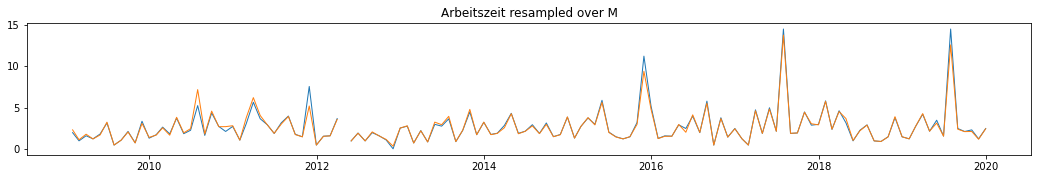

In [ ]:

resampling = 'M'
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax2 = fig.add_subplot(5,1,1)
ax2.plot(df_test['Arbeitszeit'].resample(resampling).mean(),linewidth=1)
ax2.plot(df_test['Pred'].resample(resampling).mean(),linewidth=1)
ax2.set_title('Arbeitszeit resampled over ' + resampling)
ax2.tick_params(axis='both', which='major')

In [ ]:
model = lgb.LGBMRegressor()
model.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
model.feature_importances_

array([ 137,   18,  211, 2634])

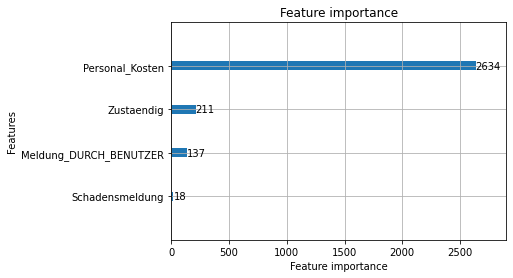

In [ ]:
lgb.plot_importance(model)
plt.show()

In [ ]:
'''
lgb.plot_tree(model,figsize=(20,30))
lgb.create_tree_digraph(model)
plt.show()
'''

'\nlgb.plot_tree(model,figsize=(20,30))\nlgb.create_tree_digraph(model)\nplt.show()\n'

## Predict t of the next action, predict duration, predict action

In [ ]:

'''
Input Features
Gemeldet_am x - t-1
Schadensmeldung or Action x t-1
Arbeitszeit x x-t-1
create feature time difference between to events (grouped by action)
create feature time difference between to events (grouped by same machine)

Output expected
Gemeldet_am y - t 
Schadensmeldung or Action y t
Arbeitszeit y t
'''

'\nInput Features\nGemeldet_am x - t-1\nSchadensmeldung or Action x t-1\nArbeitszeit x x-t-1\ncreate feature time difference between to events (grouped by action)\ncreate feature time difference between to events (grouped by same machine)\n\nOutput expected\nGemeldet_am y - t \nSchadensmeldung or Action y t\nArbeitszeit y t\n'

In [ ]:

# create new feature, time diff until next event
df.index.name = None
df = df.sort_values(by='Gemeldet_am')
df['Shifted'] = df['Gemeldet_am'].shift(periods=1)
df['Dif_next_event'] = df['Gemeldet_am'] - df['Gemeldet_am'].shift(periods=1)

In [ ]:
# create feature time diff until name event of same action
actions = df['Schadensmeldung'].unique()

labels = []
features_dif = []
df['label_num'] = 0

i = 1

for action in actions:
  # create labels 
  labels.append('y_' + action)
  df['y_' + action] = np.where(df['Schadensmeldung'] == action, 1, 0)
  i += 1
  df.loc[df['Schadensmeldung'] == action, ['label_num']] = i
  # craete time since last every combination
  
  for a in actions:  
    df_action = df[df['Schadensmeldung'] == a]
    
    if df_action.shape[0]:
      #print(a)
      features_dif.append('dif_last_' + action)
      diff = df_action['Gemeldet_am'] #- df_action['Gemeldet_am'].shift()
      df['last_' + a] = pd.np.datetime64('NaT')
      df.loc[df['Schadensmeldung'] == a, ['last_' + a]] = pd.to_datetime(diff)
      df['last_' + a] = pd.to_datetime(df['last_' + a])
      df['last_' + a] = df['last_' + a].fillna(method='ffill')
      df['dif_last_' + a] = pd.to_timedelta(df['Gemeldet_am'] - df['last_' + a])
      df['dif_last_' + a][df['dif_last_' + a] == pd.to_timedelta(0)] = pd.to_timedelta(df['Gemeldet_am'] - df['last_' + a].shift())
      df['dif_last_' + a] = pd.to_timedelta(df['dif_last_' + a])
      #features_dif.append('dif_last_' + a)

features_dif = list(set(features_dif))

df.head()

,Gemeldet_am,Meldung_DURCH_BENUTZER,Schadensmeldung,Zustaendig,Personal_Kosten,Arbeitszeit,OBJ_ID,Jahr,Monat,Tag,Stunde,Minute,Shifted,Dif_next_event,label_num,y_Alterung/Abnutzung/Verschleiß,last_Alterung/Abnutzung/Verschleiß,dif_last_Alterung/Abnutzung/Verschleiß,last_Änderung an der Maschine,dif_last_Änderung an der Maschine,last_Überlastung/Bruch/Blockierung/Deformierung,dif_last_Überlastung/Bruch/Blockierung/Deformierung,last_Undicht,dif_last_Undicht,last_Verschmutzung,dif_last_Verschmutzung,last_Ölmangel,dif_last_Ölmangel,last_Einstellfehler/Bedienfehler/Maschinencrasch,dif_last_Einstellfehler/Bedienfehler/Maschinencrasch,last_kein Fehler festellbar,dif_last_kein Fehler festellbar,last_Stromausfall,dif_last_Stromausfall,last_Spiel/Unwucht,dif_last_Spiel/Unwucht,"last_Leckage (Luft, Wasser ,Öl, Gas, KSS)","dif_last_Leckage (Luft, Wasser ,Öl, Gas, KSS)",last_Fehlende Wartung,dif_last_Fehlende Wartung,last_Herstellfehler/Konstruktionsfehler,dif_last_Herstellfehler/Konstruktionsfehler,last_kein Fehler feststellbar,dif_last_kein Fehler feststellbar,last_überhitzt/verbrannt,dif_last_überhitzt/verbrannt,y_Änderung an der Maschine,y_Überlastung/Bruch/Blockierung/Deformierung,y_Undicht,y_Verschmutzung,y_Ölmangel,y_Einstellfehler/Bedienfehler/Maschinencrasch,y_kein Fehler festellbar,y_Stromausfall,y_Spiel/Unwucht,"y_Leckage (Luft, Wasser ,Öl, Gas, KSS)",y_Fehlende Wartung,y_Herstellfehler/Konstruktionsfehler,y_kein Fehler feststellbar,y_überhitzt/verbrannt
2009-01-13 21:46:00,2009-01-13 21:46:00,SRABENSC,Alterung/Abnutzung/Verschleiß,SRABENSC,59.01,1.0,100053471,2009,1,13,21,46,NaT,NaT,2,1,2009-01-13 21:46:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009-01-14 04:16:00,2009-01-14 04:16:00,BSAMOL1,Änderung an der Maschine,MSEVIM,118.03,2.0,100053471,2009,1,14,4,16,2009-01-13 21:46:00,06:30:00,3,0,2009-01-13 21:46:00,06:30:00,2009-01-14 04:16:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2009-01-14 04:17:00,2009-01-14 04:17:00,BSAMOL1,Überlastung/Bruch/Blockierung/Deformierung,TREIMBOL,118.02,2.0,100053471,2009,1,14,4,17,2009-01-14 04:16:00,00:01:00,4,0,2009-01-13 21:46:00,06:31:00,2009-01-14 04:16:00,00:01:00,2009-01-14 04:17:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2009-01-14 05:40:00,2009-01-14 05:40:00,MKUCZERA,Alterung/Abnutzung/Verschleiß,PBREITEN,88.52,1.5,100053471,2009,1,14,5,40,2009-01-14 04:17:00,01:23:00,2,1,2009-01-14 05:40:00,07:54:00,2009-01-14 04:16:00,01:24:00,2009-01-14 04:17:00,01:23:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009-01-14 13:25:00,2009-01-14 13:25:00,GADLER1,Alterung/Abnutzung/Verschleiß,HMERCANO,29.51,0.5,100053471,2009,1,14,13,25,2009-01-14 05:40:00,07:45:00,2,1,2009-01-14 13:25:00,07:45:00,2009-01-14 04:16:00,09:09:00,2009-01-14 04:17:00,09:08:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# https://stackabuse.com/using-machine-learning-to-predict-the-weather-part-1/
# https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e
# https://medium.com/@jouneidraza522/predictive-maintenance-using-machine-learning-lstm-python-373396c6bb82 
# https://stackoverflow.com/questions/18066781/create-gantt-plot-with-python-matplotlib

In [ ]:
features_dif

['dif_last_kein Fehler feststellbar',
 'dif_last_Spiel/Unwucht',
 'dif_last_Einstellfehler/Bedienfehler/Maschinencrasch',
 'dif_last_Undicht',
 'dif_last_überhitzt/verbrannt',
 'dif_last_Fehlende Wartung',
 'dif_last_Herstellfehler/Konstruktionsfehler',
 'dif_last_Leckage (Luft, Wasser ,Öl, Gas, KSS)',
 'dif_last_Verschmutzung',
 'dif_last_Überlastung/Bruch/Blockierung/Deformierung',
 'dif_last_Änderung an der Maschine',
 'dif_last_Ölmangel',
 'dif_last_kein Fehler festellbar',
 'dif_last_Stromausfall',
 'dif_last_Alterung/Abnutzung/Verschleiß']

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

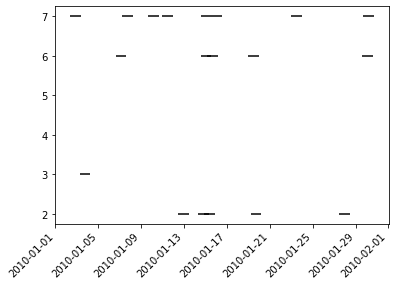

In [ ]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt

#df = df[df['Jahr'] == '2020']

df_plot = df[df['Jahr'] == 2010]
df_plot = df_plot[df_plot['Monat'] == 1]
fig = plt.figure()
ax = fig.add_subplot(111)

ax = ax.xaxis_date()
ax = plt.hlines(df_plot['label_num'], dt.date2num(df_plot.index), dt.date2num(df_plot.index) + 1)


plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
# Plot a line for every line of data in your file


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

df_train, df_test, y_train, y_test = train_test_split(df, df[labels], test_size=0.25)
X_train = df_train[features].iloc[:,1:]
X_test = df_test[features].iloc[:,1:]

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping

In [ ]:
features_col_name = [*features]
target_col_name = labels
print(features_col_name)


['Gemeldet_am', 'Meldung_DURCH_BENUTZER', 'Schadensmeldung', 'Zustaendig', 'Personal_Kosten']


In [ ]:
'''
sc = MinMaxScaler()
df_train[features_col_name]=sc.fit_transform(df_train[features_col_name])
df_test[features_col_name]=sc.transform(df_test[features_col_name])

def gen_sequence(id_df, seq_length, seq_cols):
  df_zeros=pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
  id_df=df_zeros.append(id_df,ignore_index=True)
  data_array = id_df[seq_cols].values
  num_elements = data_array.shape[0]
  lstm_array=[]
  for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
    lstm_array.append(data_array[start:stop, :])
  return np.array(lstm_array)
# function to generate labels

def gen_label(id_df, seq_length, seq_cols,label):
  df_zeros=pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
  id_df=df_zeros.append(id_df,ignore_index=True)
  data_array = id_df[seq_cols].values
  num_elements = data_array.shape[0]
  y_label=[]
  for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
    y_label.append(id_df[label][stop])
  return np.array(y_label)

# timestamp or window size
seq_length=50
seq_cols=features_col_name
X_train=np.concatenate(list(list(gen_sequence(df_train[df_train[‘month’]==id], seq_length, seq_cols)) for id in df_train[‘month’].unique()))
print(X_train.shape)
# generate y_train
y_train=np.concatenate(list(list(gen_label(df_train[df_train[‘month’]==id], 50, seq_cols,’Faulty’)) for id in df_train[‘month’].unique()))
print(y_train.shape)
# generate X_test
X_test=np.concatenate(list(list(gen_sequence(df_test[df_test[‘month’]==id], seq_length, seq_cols)) for id in df_test[‘month’].unique()))
print(X_test.shape)
# generate y_test
y_test=np.concatenate(list(list(gen_label(df_test[df_test[‘month’]==id], 50, seq_cols,’Faulty’)) for id in df_test[‘month’].unique()))
print(y_test.shape)
nb_features =X_train.shape[2]
timestamp=seq_length
model = Sequential()
model.add(LSTM(
input_shape=(timestamp, nb_features),
units=100,
return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(
units=50,
return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation=’sigmoid’))
model.compile(loss=’binary_crossentropy’, optimizer=’adam’, metrics=[‘accuracy’])
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=200, validation_split=0.05, verbose=1,
callbacks = [EarlyStopping(monitor=’val_loss’, min_delta=0, patience=0, verbose=0, mode=’auto’)])


# training metrics
scores = model.evaluate(X_train, y_train, verbose=1, batch_size=200)
print(‘Accurracy: {}’.format(scores[1]))
y_pred=model.predict_classes(X_test)
print(‘Accuracy of model on test data: ‘,accuracy_score(y_test,y_pred))
print(‘Confusion Matrix: \n’,confusion_matrix(y_test,y_pred))
'''

'\nsc = MinMaxScaler()\ndf_train[features_col_name]=sc.fit_transform(df_train[features_col_name])\ndf_test[features_col_name]=sc.transform(df_test[features_col_name])\n\ndef gen_sequence(id_df, seq_length, seq_cols):\n  df_zeros=pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)\n  id_df=df_zeros.append(id_df,ignore_index=True)\n  data_array = id_df[seq_cols].values\n  num_elements = data_array.shape[0]\n  lstm_array=[]\n  for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):\n    lstm_array.append(data_array[start:stop, :])\n  return np.array(lstm_array)\n# function to generate labels\n\ndef gen_label(id_df, seq_length, seq_cols,label):\n  df_zeros=pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)\n  id_df=df_zeros.append(id_df,ignore_index=True)\n  data_array = id_df[seq_cols].values\n  num_elements = data_array.shape[0]\n  y_label=[]\n  for start, stop in zip(range(0, num_elements-seq_length), r

In [ ]:
print(labels)
print(features_dif)
print(df_train[labels[0]].shape)
print(df_train[features_dif[0]].shape)

['y_Alterung/Abnutzung/Verschleiß', 'y_Änderung an der Maschine', 'y_Überlastung/Bruch/Blockierung/Deformierung', 'y_Undicht', 'y_Verschmutzung', 'y_Ölmangel', 'y_Einstellfehler/Bedienfehler/Maschinencrasch', 'y_kein Fehler festellbar', 'y_Stromausfall', 'y_Spiel/Unwucht', 'y_Leckage (Luft, Wasser ,Öl, Gas, KSS)', 'y_Fehlende Wartung', 'y_Herstellfehler/Konstruktionsfehler', 'y_kein Fehler feststellbar', 'y_überhitzt/verbrannt']
['dif_last_kein Fehler feststellbar', 'dif_last_Spiel/Unwucht', 'dif_last_Einstellfehler/Bedienfehler/Maschinencrasch', 'dif_last_Undicht', 'dif_last_überhitzt/verbrannt', 'dif_last_Fehlende Wartung', 'dif_last_Herstellfehler/Konstruktionsfehler', 'dif_last_Leckage (Luft, Wasser ,Öl, Gas, KSS)', 'dif_last_Verschmutzung', 'dif_last_Überlastung/Bruch/Blockierung/Deformierung', 'dif_last_Änderung an der Maschine', 'dif_last_Ölmangel', 'dif_last_kein Fehler festellbar', 'dif_last_Stromausfall', 'dif_last_Alterung/Abnutzung/Verschleiß']
(2322,)
(2322,)


In [ ]:
df.head()

In [ ]:

df.set_index('OBJ_ID', inplace=True)


In [367]:
print(labels)
df[['label_num', 'Schadensmeldung']].head()

['y_Alterung/Abnutzung/Verschleiß', 'y_Änderung an der Maschine', 'y_Überlastung/Bruch/Blockierung/Deformierung', 'y_Undicht', 'y_Verschmutzung', 'y_Ölmangel', 'y_Einstellfehler/Bedienfehler/Maschinencrasch', 'y_kein Fehler festellbar', 'y_Stromausfall', 'y_Spiel/Unwucht', 'y_Leckage (Luft, Wasser ,Öl, Gas, KSS)', 'y_Fehlende Wartung', 'y_Herstellfehler/Konstruktionsfehler', 'y_kein Fehler feststellbar', 'y_überhitzt/verbrannt']


,label_num,Schadensmeldung
2009-01-13 21:46:00,2,Alterung/Abnutzung/Verschleiß
2009-01-14 04:16:00,3,Änderung an der Maschine
2009-01-14 04:17:00,4,Überlastung/Bruch/Blockierung/Deformierung
2009-01-14 05:40:00,2,Alterung/Abnutzung/Verschleiß
2009-01-14 13:25:00,2,Alterung/Abnutzung/Verschleiß


In [ ]:
# Specify parameters to use 
# N.B. You can change the sequence length here

# reduce the n of labels?
# more observations
# diffirent time lapse 

events = labels.copy()
events = ['0-Dummy'] + events
categories = len(events)

series_length = 100

time_steps = series_length -1 

# Set index to use .loc
# oportuniy = machine id
# Create sequences - stored in the history variable
history = []

for x in range(len(df.values) - series_length):
    history.append(df['label_num'].values[x: x + series_length])

'''
[1(Alterung, 23432), 2(Undicht, 12343), 3(Verbrant, 232232)]
10:12 Alterung
10:12 
'''
print(history)
print(categories)


[array([2, 3, 4, 2, 2, 5, 5, 5, 2, 6]), array([3, 4, 2, 2, 5, 5, 5, 2, 6, 7]), array([4, 2, 2, 5, 5, 5, 2, 6, 7, 2]), array([2, 2, 5, 5, 5, 2, 6, 7, 2, 2]), array([2, 5, 5, 5, 2, 6, 7, 2, 2, 2]), array([5, 5, 5, 2, 6, 7, 2, 2, 2, 2]), array([5, 5, 2, 6, 7, 2, 2, 2, 2, 2]), array([5, 2, 6, 7, 2, 2, 2, 2, 2, 7]), array([2, 6, 7, 2, 2, 2, 2, 2, 7, 2]), array([6, 7, 2, 2, 2, 2, 2, 7, 2, 7]), array([7, 2, 2, 2, 2, 2, 7, 2, 7, 2]), array([2, 2, 2, 2, 2, 7, 2, 7, 2, 6]), array([2, 2, 2, 2, 7, 2, 7, 2, 6, 7]), array([2, 2, 2, 7, 2, 7, 2, 6, 7, 8]), array([2, 2, 7, 2, 7, 2, 6, 7, 8, 2]), array([2, 7, 2, 7, 2, 6, 7, 8, 2, 7]), array([7, 2, 7, 2, 6, 7, 8, 2, 7, 7]), array([2, 7, 2, 6, 7, 8, 2, 7, 7, 7]), array([7, 2, 6, 7, 8, 2, 7, 7, 7, 6]), array([2, 6, 7, 8, 2, 7, 7, 7, 6, 7]), array([6, 7, 8, 2, 7, 7, 7, 6, 7, 7]), array([7, 8, 2, 7, 7, 7, 6, 7, 7, 7]), array([8, 2, 7, 7, 7, 6, 7, 7, 7, 8]), array([2, 7, 7, 7, 6, 7, 7, 7, 8, 2]), array([7, 7, 7, 6, 7, 7, 7, 8, 2, 2]), array([7, 7, 6, 7, 7, 7,

In [ ]:

# Import keras utils
from tensorflow.keras.utils import to_categorical

# Create input and one-hot
X = np.array([row[:time_steps] for row in history])
X = to_categorical(X)
X.shape

(2990, 9, 17)

In [ ]:
# Create target and one-hot
y = np.array([row[time_steps] for row in history])
print(y.shape)
y = to_categorical(y)
print(y.shape)
y = y.reshape(-1, categories + 1)

y.shape

(2990,)
(2990, 17)


(2990, 17)

In [ ]:
# Import split function
from sklearn.model_selection import train_test_split

# Split the dataset with a 30% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, y_train.shape

((2093, 9, 17), (2093, 17))

In [370]:
# Import tensorflow libs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow
# Create a model instance
model = Sequential()

# Add the layers
model.add(LSTM(10, activation='relu', return_sequences=True, input_shape=(time_steps, categories+1)))
model.add(LSTM(30, activation='relu'))
model.add(Dense(categories+1, activation='softmax'))

# Build the graph
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train,y_train, epochs=10)


Epoch 1/10
66/66 [==============================] - 1s 8ms/step - loss: 2.7061 - accuracy: 0.4802
Epoch 2/10
66/66 [==============================] - 1s 8ms/step - loss: 1.5235 - accuracy: 0.5934
Epoch 3/10
66/66 [==============================] - 1s 8ms/step - loss: 1.3730 - accuracy: 0.5934
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 1.3671 - accuracy: 0.5934
Epoch 5/10
66/66 [==============================] - 1s 8ms/step - loss: 1.3682 - accuracy: 0.5934
Epoch 6/10
66/66 [==============================] - 1s 8ms/step - loss: 1.3610 - accuracy: 0.5934
Epoch 7/10
66/66 [==============================] - 1s 8ms/step - loss: 1.3584 - accuracy: 0.5934
Epoch 8/10
66/66 [==============================] - 1s 8ms/step - loss: 1.3608 - accuracy: 0.5934
Epoch 9/10
66/66 [==============================] - 1s 8ms/step - loss: 1.3572 - accuracy: 0.5934
Epoch 10/10
66/66 [==============================] - 1s 8ms/step - loss: 1.3585 - accuracy: 0.5934


In [ ]:


# Import tf to use sessions
import tensorflow as tf
from tensorflow.keras.metrics import top_k_categorical_accuracy
import keras
from sklearn.metrics import confusion_matrix,accuracy_score

# Create predictions
prediction = model.predict(X_test)
# Map to events

print(events[np.argmax(prediction[1])])
results = model.evaluate(X_test, y_test)
print("-------------------------")
print("test loss, test acc:", results, '\n')

#model.summary()



y_Änderung an der Maschine
29/29 [==============================] - 0s 2ms/step - loss: 1.3678 - accuracy: 0.6109
-------------------------
test loss, test acc: [1.3677865266799927, 0.6109253168106079] 



In [ ]:
y_pred = model.predict_classes(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,